# 1: INTRODUCTION
# 1.1 Problem Definition

The objective of this project is to design and implement a machine learning-based spam detection system that automatically classifies incoming messages as Spam or Ham (Not Spam).

  # 1.2 Objectives

To analyze SMS message data

To perform Exploratory Data Analysis (EDA)

To build an ML classification model

To implement a reusable ML pipeline

To save the trained model using Pickle

To prepare the system for deployment

  # 1.3 Scope of the Project

Works on real Kaggle dataset

Can be deployed as a web application

Scalable to emails, chats, and social media text.

#  2:DATA COLLECTION & DATA UNDERSTANDING
#   2.1 Data Source

The dataset used is the SMS Spam Collection Dataset obtained from Kaggle.
It contains labeled SMS messages categorized as spam or ham.

 # 2.2 Dataset Description
Attribute	Description
text	Content of SMS message
label	Target variable (spam / ham)
 # 2.3 Importance of Data Understanding

Identifying feature types

Detecting missing values

Choosing suitable preprocessing methods

Avoiding modeling errors

# 3: DATA PREPROCESSING
 # 3.1 Data Cleaning
What is Data Cleaning?

Data cleaning is the process of identifying and correcting errors or inconsistencies in data.

Why is it Required?

Machine learning models cannot process:

Missing values

Categorical text labels

Steps Performed

Checked for null values

Converted categorical labels to numerical values

 # 3.2 Label Encoding
Why Label Encoding?

ML algorithms work only with numerical data.

Conversion Logic

Ham → 0

Spam → 1

# Import Libraries

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle


In [8]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.info() # data information 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
# Missing Values Check
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [13]:
#Data Cleaning & Preparation
df.rename(columns={
    'Category': 'label',
    'Message': 'text'
}, inplace=True)


In [14]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [15]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


# 4: EXPLORATORY DATA ANALYSIS (EDA)
 # 4.1 Purpose of EDA

Understand data distribution

Identify class imbalance

Detect patterns and trends

Support feature engineering decisions

 # 4.2 Class Distribution Analysis
Ham messages are significantly more than spam messages

Dataset is imbalanced

Why This Matters?

Class imbalance can bias the model toward the majority class.

 # 4.3 Message Length Analysis
Spam messages tend to be longer

Ham messages are usually shorter

Insight

This indicates textual patterns useful for classification.

 # 4.4 Tools Used for EDA

Matplotlib for visualization

Pandas for data manipulation

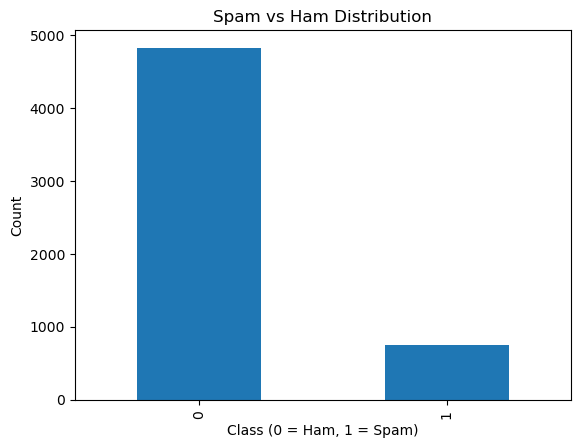

In [17]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.xlabel("Class (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.title("Spam vs Ham Distribution")
plt.show()


# Insight:

Dataset is imbalanced
Ham messages are more frequent

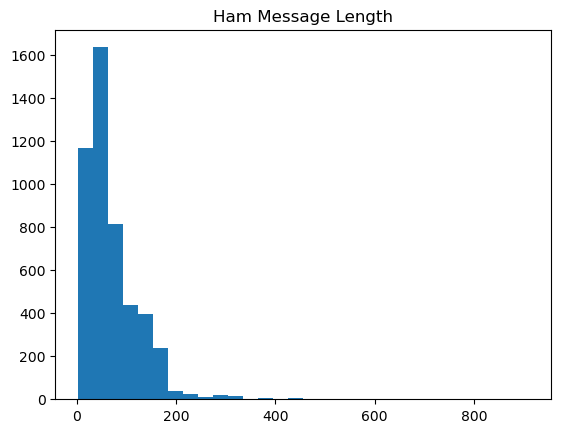

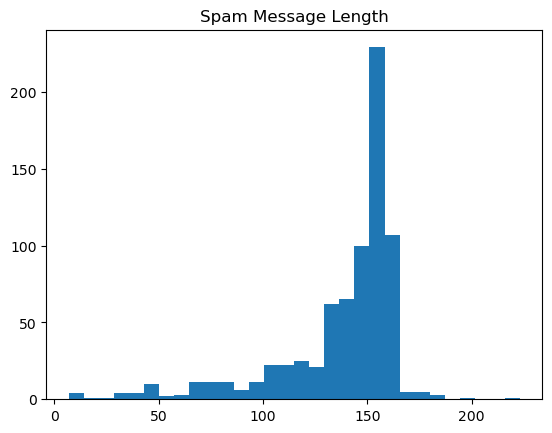

In [18]:
df['msg_length'] = df['text'].apply(len)

plt.hist(df[df['label']==0]['msg_length'], bins=30)
plt.title("Ham Message Length")
plt.show()

plt.hist(df[df['label']==1]['msg_length'], bins=30)
plt.title("Spam Message Length")
plt.show()


# Insight:

Spam messages are generally longer

Contains promotional keywords

# 5: FEATURE ENGINEERING
 # 5.1 What is Feature Engineering?

Feature engineering is the process of transforming raw data into meaningful features that improve model performance.

 # 5.2 TF-IDF Vectorization
What is TF-IDF?

TF-IDF (Term Frequency–Inverse Document Frequency) converts text into numerical vectors based on word importance.

Why TF-IDF?

Reduces impact of common words

Highlights important keywords

Works well with text classification problems

In [19]:
# feature and target selection
X = df['text']   # Feature
y = df['label']  # Target 

# 6: MODEL BUILDING
  # 6.1 Train-Test Split
Purpose

To evaluate model performance on unseen data.

Ratio Used

Training: 80%

Testing: 20%



In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
X_train

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: text, Length: 4457, dtype: object

# Theory:

Training data → model learning

Testing data → unbiased evaluation

# MACHINE LEARNING PIPELINE
What is a Pipeline?

A pipeline chains preprocessing and modeling into one flow.

Why Use Pipeline?

Prevents data leakage

Simplifies deployment

Industry standard

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Pipeline creation 
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('model', MultinomialNB())
])


# 7 :Model Training

In [23]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('model', MultinomialNB())])

# 8: MODEL EVALUATION
 # 8.1 Evaluation Metrics
Metric	Description
Accuracy	Overall correctness
Precision	Spam detection correctness
Recall	Ability to detect all spam
F1-Score	Balance of precision & recall

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# model evaluation 
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



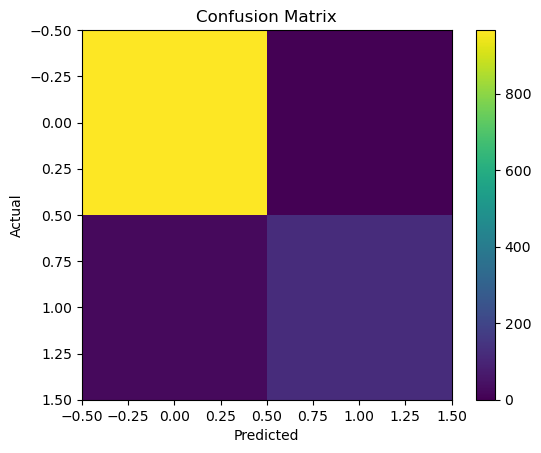

In [25]:
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Theory:

True Positive → Correct spam detection

False Negative → Spam missed (dangerous)

# 9: MODEL SERIALIZATION
 # 9.1 What is Pickle?

Pickle is a Python module used to serialize and save trained models.

# 9.2 Why Pickle?

Enables deployment

Saves training time

Ensures consistent predictions

In [26]:
import pickle

with open("spam_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)


# 10: CONCLUSION
10.1 Summary

The project successfully demonstrates an end-to-end machine learning workflow including:

Data preprocessing

EDA

Feature engineering

Pipeline creation

Model training and evaluation

Model deployment readiness